In [7]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_3"

# Load the file
if os.path.isfile(binecode_path):
    g3 = Graph.load_from_file(binecode_path)
    print(g3)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=97252, number_of_vertices=26533, number_of_temporal_edges=159288593, earliest_time="7200000", latest_time="10799999")


In [1]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_4"

# Load the file
if os.path.isfile(binecode_path):
    g = Graph.load_from_file(binecode_path)
    print(g)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=91201, number_of_vertices=25666, number_of_temporal_edges=145486068, earliest_time="10800000", latest_time="14399999")


Rank 1: MS_27421 with a score of 0.03349
Rank 2: MS_37691 with a score of 0.01615
Rank 3: MS_2827 with a score of 0.00588
Rank 4: MS_46825 with a score of 0.00504
Rank 5: MS_21537 with a score of 0.00335
Rank 6: MS_21883 with a score of 0.00315
Rank 7: MS_44585 with a score of 0.00285
Rank 8: MS_19585 with a score of 0.00211
Rank 9: MS_46708 with a score of 0.00203
Rank 10: MS_27487 with a score of 0.00185


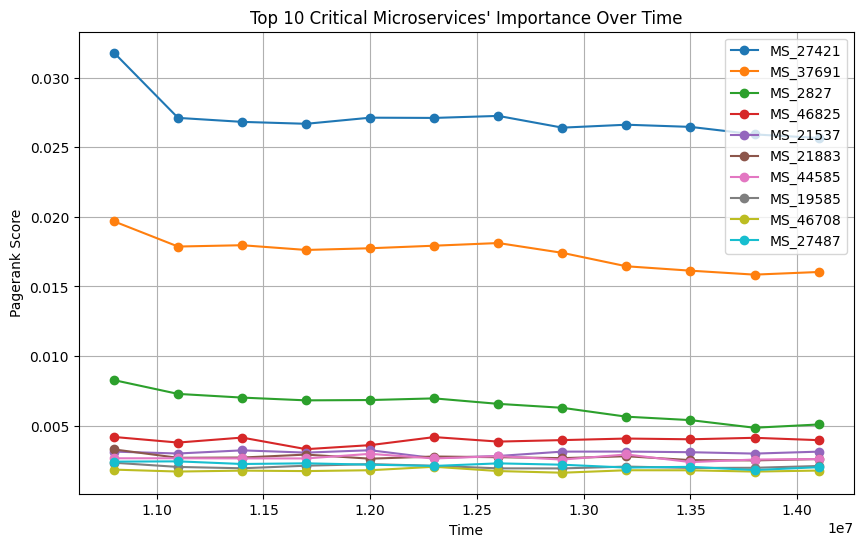

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import algorithms as rp

# Get top 10 most important ms
results = rp.pagerank(g)
top_10 = results.top_k(10)

# Initialise a dictionary to store time and importance scores for each ms based on the data provided in pagerank()
service_data = {name: {'time': [], 'importance': []} for rank, (name, score) in enumerate(top_10, 1)}

# Iterate through the top 10 ms and collect their importance scores over time
for rank, (name, score) in enumerate(top_10, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

    # Store for each ms the scores along with the corresponding time points.
    for windowed_graph in g.rolling(window=300000): # 5 minute window
        result = rp.pagerank(windowed_graph)
        service_data[name]['time'].append(windowed_graph.earliest_time)
        service_data[name]['importance'].append(result.get(str(name)))

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each ms' importance over time
for name, data in service_data.items():
    plt.plot(data['time'], data['importance'], marker="o", label=name)

plt.xlabel("Time")
plt.ylabel("Pagerank Score")
plt.title("Top 10 Critical Microservices' Importance Over Time")
plt.grid(True)
plt.legend()
plt.show()

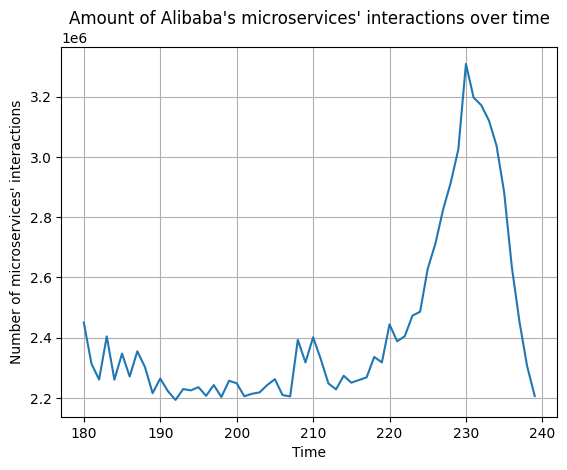

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

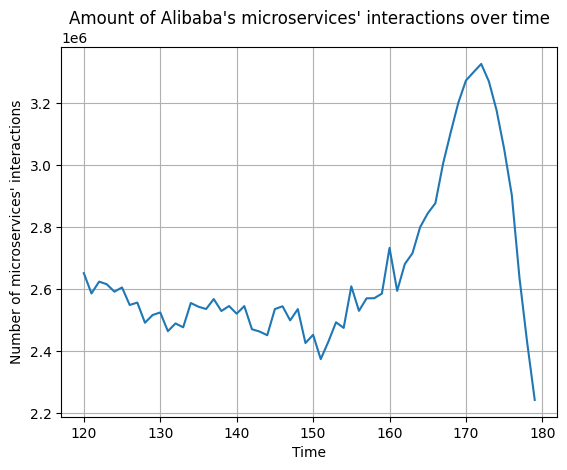

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g3.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

In [22]:
from raphtory import algorithms as rp
from raphtory import Graph

start_time = 9600000 # Minute 160
end_time = 10799999 # Minute 180

g_spike = g3.window(start_time, end_time)

In [36]:
print(g_spike)

Graph(number_of_edges=52611, number_of_vertices=17340, number_of_temporal_edges=17970098, earliest_time="9675000", latest_time="10062999")


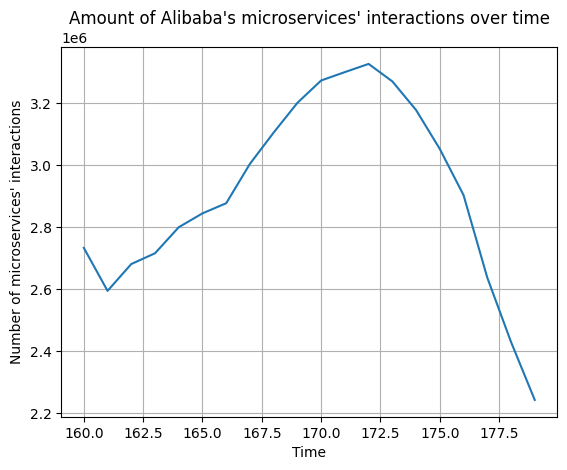

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g_spike.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

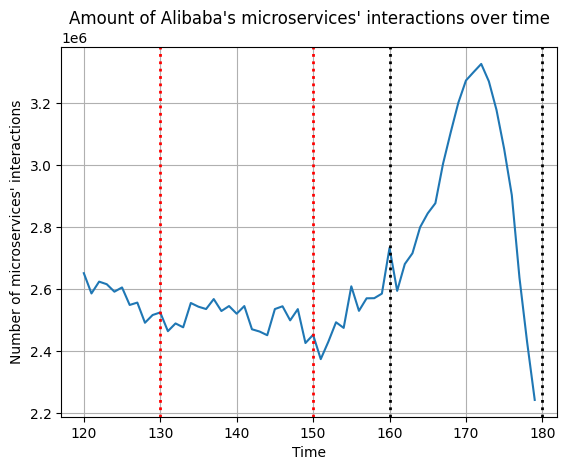

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g3.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

# Draw red vertical dotted lines at specific minutes
minutes_for_lines = [130, 150]
for minute in minutes_for_lines:
    plt.axvline(x=minute, color='r', linestyle=':', linewidth=2)

# Draw red vertical dotted lines at specific minutes
minutes_for_lines = [160, 180]
for minute in minutes_for_lines:
    plt.axvline(x=minute, color='black', linestyle=':', linewidth=2)

plt.show()

# Connected Components Analysis on a Spike

In [31]:
# Run a community detection algorithm which checks lcc in the graph
lcc =  rp.weakly_connected_components(g_spike)

num_of_nodes_lcc = lcc.to_string()

# Print the number of nodes inside lcc
print(num_of_nodes_lcc)

Algorithm Name: Connected Components, Number of Vertices: 17340, Result Type: std::collections::hash::map::HashMap<alloc::string::String, u64>


In [35]:
print(lcc.get_all())

{'MS_17979': 3118218356843241, 'MS_52727': 3118218356843241, 'MS_45035': 3118218356843241, 'MS_60067': 3118218356843241, 'MS_14219': 4330803427073251734, 'MS_29494': 3118218356843241, 'MS_46192': 3118218356843241, 'MS_32368': 3118218356843241, 'MS_5281': 3118218356843241, 'MS_48171': 3118218356843241, 'MS_1786': 3118218356843241, 'MS_47236': 3118218356843241, 'MS_22379': 3118218356843241, 'MS_9783': 3118218356843241, 'MS_58631': 3118218356843241, 'MS_40564': 3118218356843241, 'MS_69218': 3118218356843241, 'MS_55692': 3118218356843241, 'MS_27906': 3118218356843241, 'MS_71234': 2920808867372733037, 'MS_68419': 3118218356843241, 'MS_18943': 3118218356843241, 'MS_54353': 3118218356843241, 'MS_388': 3118218356843241, 'MS_17173': 3118218356843241, 'MS_51404': 3118218356843241, 'MS_25513': 3118218356843241, 'MS_58530': 3118218356843241, 'MS_47587': 3118218356843241, 'MS_19244': 3118218356843241, 'MS_42140': 3118218356843241, 'MS_65390': 3118218356843241, 'MS_42881': 3118218356843241, 'MS_6950

In [37]:
# Initialise a dict variable to return dictionary
components_dict = lcc.get_all()

# Use set comprehension to get unique component IDs
unique_components = {component for component in components_dict.values()}

# The number of unique components is the length of this set
number_of_components = len(unique_components)

print(f"There are {number_of_components} connected components.")

There are 165 connected components.


In [39]:
# Count the frequency of each component ID
from collections import Counter

component_sizes = Counter(components_dict.values())

# Find the top ten largest components
top_ten_components = component_sizes.most_common(20)

top_ten_components

[(3118218356843241, 16904),
 (130146132959852630, 25),
 (203493693333404799, 16),
 (158980368222622752, 12),
 (4701903238264678795, 8),
 (1165884667341629874, 8),
 (4196549528718396254, 8),
 (410284293080983263, 7),
 (5088706481665869315, 7),
 (331931368370911103, 6),
 (10744731213220497, 6),
 (449904557973135137, 6),
 (4880870883199315986, 6),
 (3785684528830304026, 6),
 (5135773395917876674, 5),
 (186149282446293837, 5),
 (1781178515208842460, 4),
 (877258476206832326, 4),
 (5234360277413965137, 4),
 (3670546140631984596, 4)]

In [40]:
from raphtory import algorithms as rp
from raphtory import Graph

start_time = 7800000 # Minute 130
end_time = 9000000 # Minute 150

g_no_spike = g3.window(start_time, end_time)

In [41]:
print(g_no_spike)

Graph(number_of_edges=60532, number_of_vertices=19552, number_of_temporal_edges=50227382, earliest_time="7800000", latest_time="8999999")


In [43]:
# Run a community detection algorithm which checks lcc in the graph
lcc_no_spike =  rp.weakly_connected_components(g_no_spike)

num_of_nodes_lcc = lcc_no_spike.to_string()

# Print the number of nodes inside lcc
print(num_of_nodes_lcc)

Algorithm Name: Connected Components, Number of Vertices: 19552, Result Type: std::collections::hash::map::HashMap<alloc::string::String, u64>


In [49]:
from raphtory import algorithms as rp

# Initialise a dict variable to return dictionary
components_dict_no_spike = lcc_no_spike.get_all()

# Use set comprehension to get unique component IDs
unique_components_no_spike = {component for component in components_dict_no_spike.values()}

# The number of unique components is the length of this set
number_of_components_no_spike = len(unique_components_no_spike)

print(f"There are {number_of_components_no_spike} connected components.")

There are 190 connected components.


In [50]:
# Count the frequency of each component ID
from collections import Counter

component_sizes_no_spike = Counter(components_dict_no_spike.values())

# Find the top ten largest components
top_ten_components_no_spike = component_sizes_no_spike.most_common(20)

top_ten_components_no_spike

[(3118218356843241, 19068),
 (130146132959852630, 31),
 (203493693333404799, 16),
 (249463379817223188, 16),
 (2987904179571594423, 7),
 (449904557973135137, 7),
 (410284293080983263, 7),
 (331931368370911103, 6),
 (3785684528830304026, 6),
 (186149282446293837, 5),
 (1781178515208842460, 5),
 (672108238082977289, 5),
 (2781031681673299362, 4),
 (1392121052409500105, 4),
 (5920524987797923488, 4),
 (11619078271674380934, 4),
 (906644737416631882, 4),
 (5234360277413965137, 4),
 (7506787080702247327, 4),
 (2629196602991257471, 4)]

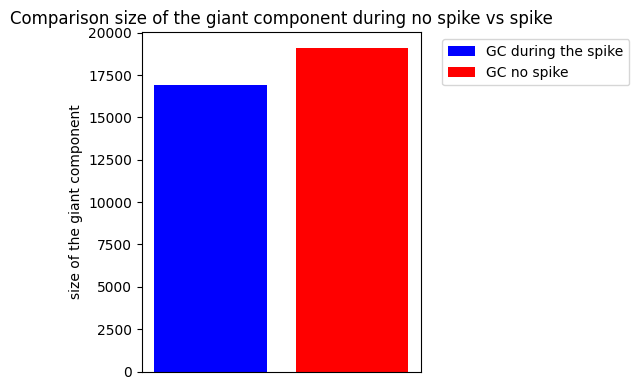

In [83]:
import matplotlib.pyplot as plt
from collections import Counter

"""
Compare the size of the giant component during no spike vs spike
"""

# Find the giant components for each
gc_no_spike = component_sizes_no_spike.most_common(1)
gc_no_spike = gc_no_spike[0][1]

gc_spike = component_sizes.most_common(1)
gc_spike = gc_spike[0][1]

# Plotting both the bar charts
plt.figure(figsize=(6, 4))

# Plot bars
plt.bar(0, gc_spike, width=0.4, label='GC during the spike', color='b', align='center')
plt.bar(0.5, gc_no_spike, width=0.4, label='GC no spike', color='r', align='center')

# Adding labels
plt.ylabel('size of the giant component')
plt.title('Comparison size of the giant component during no spike vs spike')

# Remove x-axis labels
plt.xticks([])

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

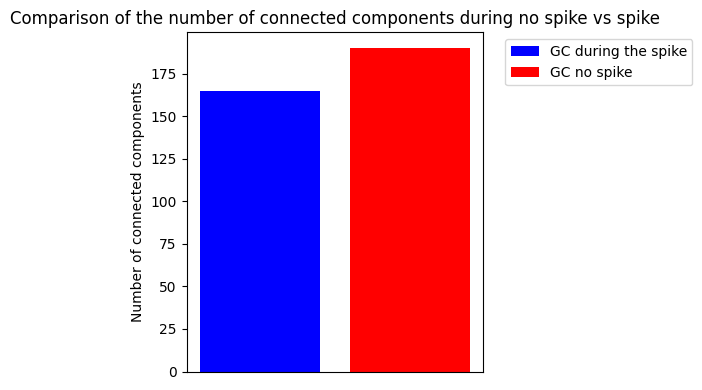

In [82]:
import matplotlib.pyplot as plt

"""
Compare the number of connected components during no spike vs spike
"""

# Plotting both the bar charts
plt.figure(figsize=(6, 4))

# Plot bars
plt.bar(0, number_of_components, width=0.4, label='GC during the spike', color='b', align='center')
plt.bar(0.5, number_of_components_no_spike, width=0.4, label='GC no spike', color='r', align='center')

# Add y-axis label
plt.ylabel('Number of connected components')

# Set title
plt.title('Comparison of the number of connected components during no spike vs spike')

# Remove x-axis labels
plt.xticks([])

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()